In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [221]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [222]:
train.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [223]:
test.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'],
      dtype='object')

In [224]:
train.shape,test.shape

((28382, 21), (28382, 20))

In [225]:
train.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [226]:
train['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

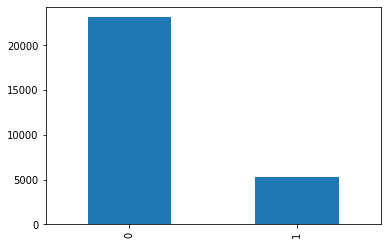

In [227]:
train['churn'].value_counts().plot.bar()

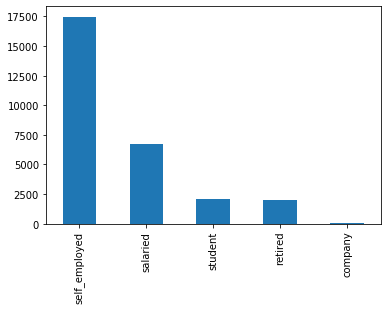

In [228]:

train['occupation'].value_counts().plot.bar()

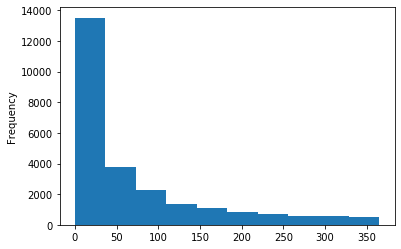

In [229]:
train['days_since_last_transaction'].plot.hist()

churn              0     1
occupation                
company           36     4
retired         1719   305
salaried        5557  1147
self_employed  14009  3467
student         1734   324


Text(0, 0.5, 'Percentage')

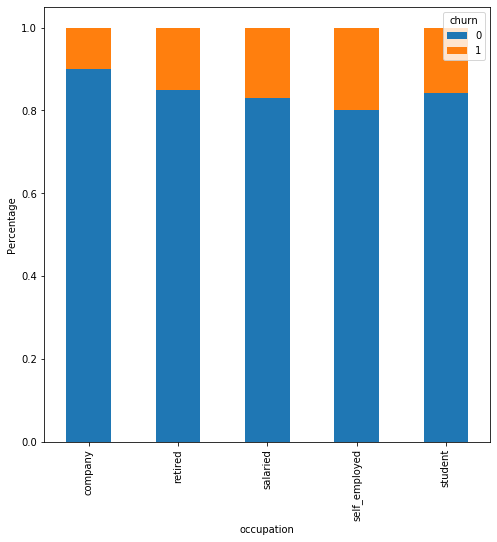

In [235]:

print(pd.crosstab(train['occupation'],train['churn']))

job=pd.crosstab(train['occupation'],train['churn'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('occupation')
plt.ylabel('Percentage')

In [236]:
train.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


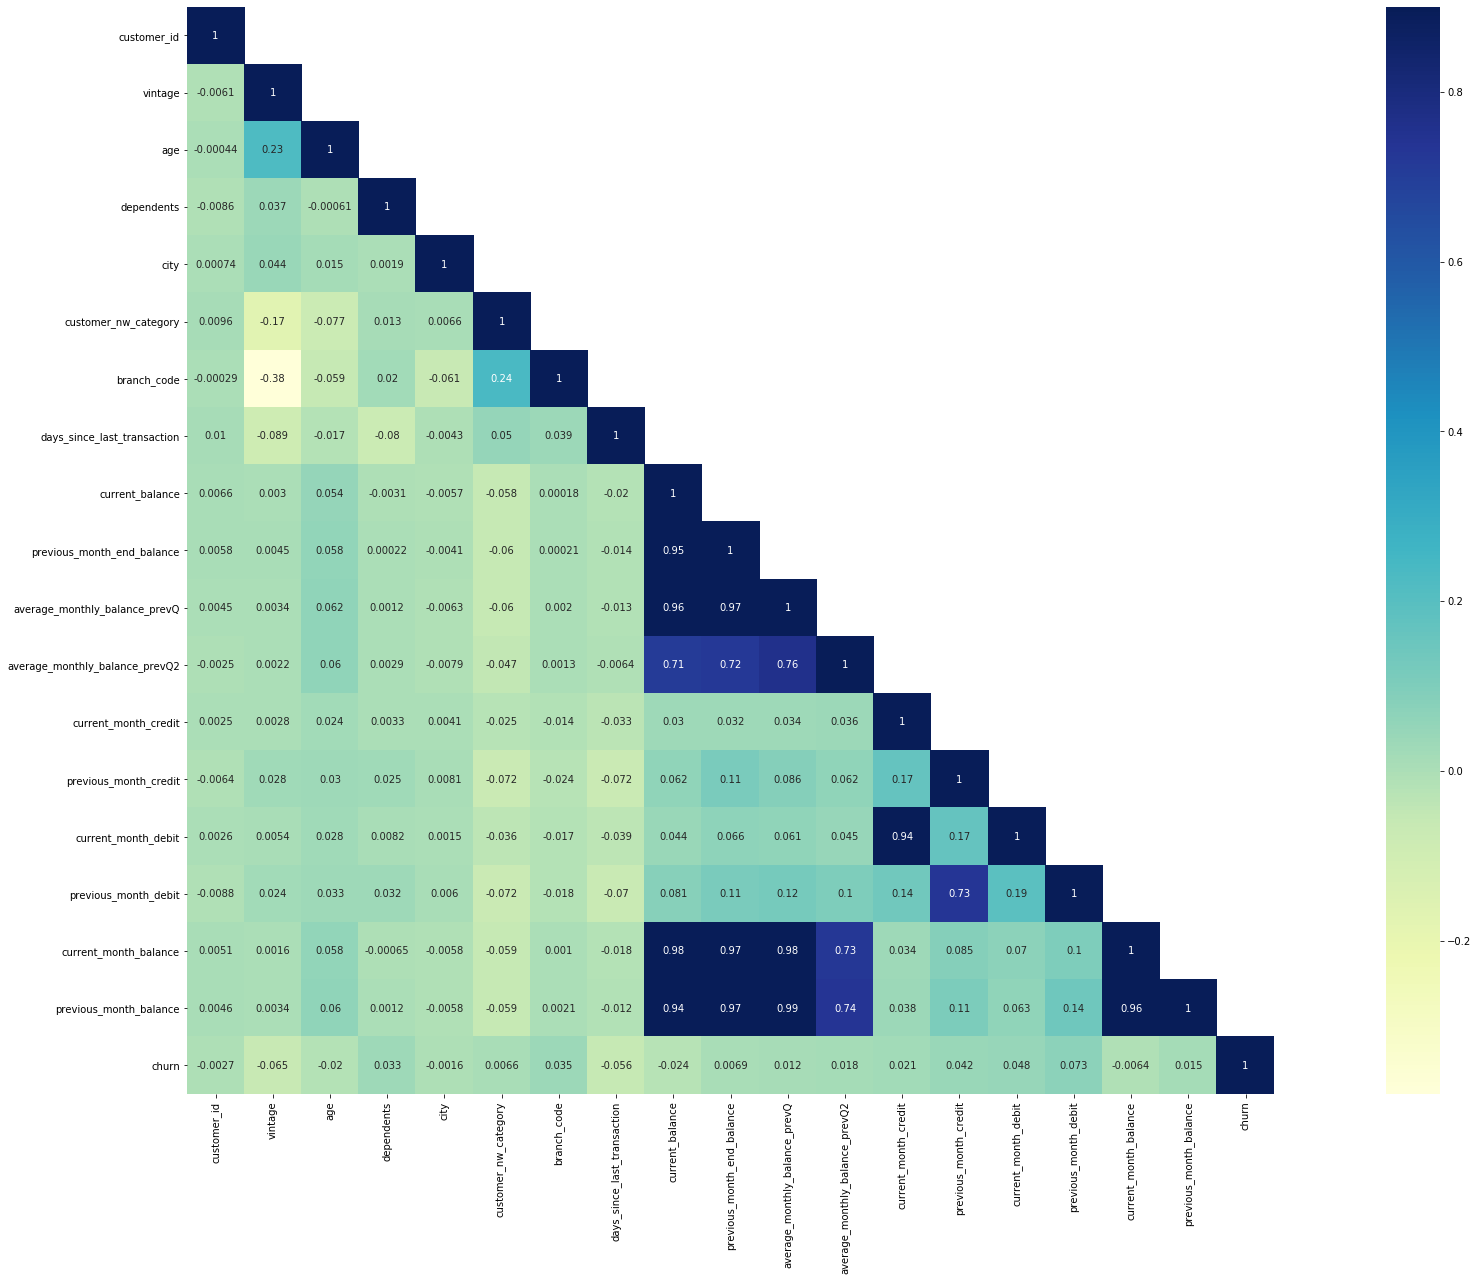

In [242]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,20)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

churn                     0     1
customer_nw_category             
1                      3001   710
2                     11953  2606
3                      8168  1944


Text(0, 0.5, 'Percentage')

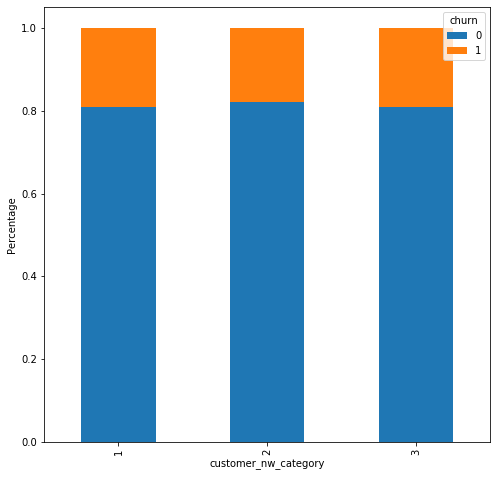

In [247]:
print(pd.crosstab(train['customer_nw_category'],train['churn']))

job=pd.crosstab(train['customer_nw_category'],train['churn'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('customer_nw_category')
plt.ylabel('Percentage')

In [265]:
train.isnull().sum()


customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [249]:
train['gender'].mode()

0    Male
dtype: object

In [252]:
train['gender'].fillna(value=(train['gender'].mode()[0]),inplace=True)

In [254]:
train['dependents'].mode()

0    0.0
dtype: float64

In [255]:
train['dependents'].fillna(value=(train['dependents'].mode()[0]),inplace=True)

In [256]:
train['city'].mode()

0    1020.0
dtype: float64

In [257]:
train['city'].fillna(value=(train['city'].mode()[0]),inplace=True)

In [295]:
train['days_since_last_transaction'].mean()

69.99781390356986

In [262]:
train['days_since_last_transaction'].fillna(value=(train['days_since_last_transaction'].mean()),inplace=True)

In [264]:
train['occupation'].fillna(value=(train['occupation'].mode()[0]),inplace=True)

In [266]:

target = train['churn']
train = train.drop('churn',1)

In [267]:
train = pd.get_dummies(train)

In [269]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
lreg = LogisticRegression()

In [273]:
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
prediction = lreg.predict(X_val)

In [275]:

from sklearn.metrics import accuracy_score

In [276]:
accuracy_score(y_val, prediction)

0.8242029240796195

In [277]:
from sklearn.tree import DecisionTreeClassifier


In [278]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [279]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [280]:
predict = clf.predict(X_val)

In [282]:
accuracy_score(y_val, predict)

0.8552052140214902

In [293]:
test.isnull().sum()

customer_id                       0
vintage                           0
age                               0
dependents                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
gender_Female                     0
gender_Male                       0
occupation_company                0
occupation_retired                0
occupation_salaried               0
occupation_self_employed          0
occupation_student                0
dtype: int64

In [289]:
test['dependents'].fillna(value=(test['dependents'].mode()[0]),inplace=True)

In [291]:
test['city'].fillna(value=(test['city'].mode()[0]),inplace=True)

In [292]:
test['days_since_last_transaction'].fillna(value=(test['days_since_last_transaction'].mean()),inplace=True)

In [296]:
test = pd.get_dummies(test)

In [297]:
test_prediction = clf.predict(test)

In [299]:
submission = pd.DataFrame()

In [302]:
submission['customer_id'] = test['customer_id']
submission['churn'] = test_prediction

In [303]:
submission.to_csv('submission.csv', header=True, index=False)